In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn import svm
import warnings

In [39]:
train_data=pd.read_csv("Titanic/train.csv")
test_data=pd.read_csv("Titanic/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

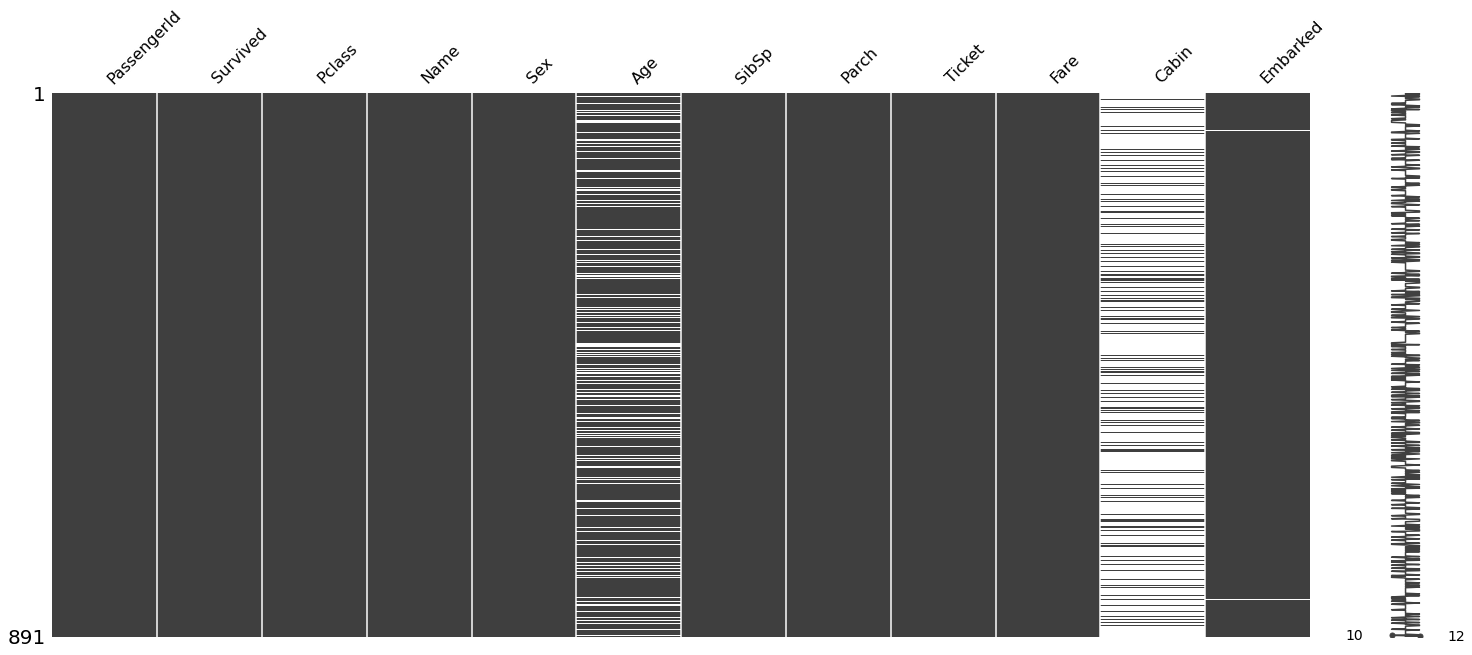

In [43]:
msno.matrix(train_data)
plt.show()

In [44]:
train_data[["Embarked","Name"]].groupby(by=["Embarked"],as_index=True).count().sort_values("Name",ascending=False)

,Name
Embarked,
S,644
C,168
Q,77


In [45]:
import numpy as np
most_repeated="S"
train_data.Embarked.replace(np.nan,most_repeated,inplace=True)
test_data.Embarked.replace(np.nan,most_repeated,inplace=True)

In [46]:
embarked_dict={"S":1,"C":2,"Q":3}
for value in embarked_dict:
    train_data.Embarked.replace(value,embarked_dict.get(value),inplace=True)
    test_data.Embarked.replace(value,embarked_dict.get(value),inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


In [47]:
train_data.Cabin.isnull().sum()

687

In [48]:
train_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)

In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1


In [50]:
train_data.Fare=train_data.Fare.astype("int64")
test_data.Fare.replace(np.nan,test_data.Fare.mean(),inplace=True)
test_data.Fare=test_data.Fare.astype("int64")

In [51]:
bins_i = [-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
labels_i = [1,2,3,4,5,6,7,8,9,10,11]

train_data['stage'] = 0
train_data['stage'] = pd.cut(train_data.Fare, bins=bins_i, labels=labels_i)

test_data['stage'] = 0
test_data['stage'] = pd.cut(test_data.Fare, bins=bins_i, labels=labels_i)

In [52]:
train_data.Fare = train_data.stage.astype("int64")
test_data.Fare = test_data.stage.astype("int64")
train_data.drop("stage", axis=1, inplace=True)
test_data.drop("stage", axis=1, inplace=True)

In [53]:
train_data.drop("Ticket", axis=1, inplace=True)
test_data.drop("Ticket", axis=1, inplace=True)

In [54]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,1,1


In [55]:
Sex_dict = {"male":1, "female":2}
for key, value in Sex_dict.items():
    train_data.Sex.replace(key, value, inplace=True)
    test_data.Sex.replace(key, value, inplace=True)
train_data.Sex = train_data.Sex.astype("int64")
test_data.Sex = test_data.Sex.astype("int64")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,1


In [56]:
train_data["Title"] = 0

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data = [train_data, test_data]
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data =train_data.drop(['Name'], axis=1)
test_data =test_data.drop(['Name'], axis=1)
train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,1,1,1
1,2,1,1,2,38.0,1,0,2,2,3
2,3,1,3,2,26.0,0,0,1,1,2
3,4,1,1,2,35.0,1,0,2,1,3
4,5,0,3,1,35.0,0,0,1,1,1


In [57]:
train_data.drop("Age",axis=1,inplace=True)
test_data.drop("Age",axis=1,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,1,0,1,1,1
1,2,1,1,2,1,0,2,2,3
2,3,1,3,2,0,0,1,1,2
3,4,1,1,2,1,0,2,1,3
4,5,0,3,1,0,0,1,1,1


In [58]:
data = [train_data,test_data]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

In [59]:
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print (train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


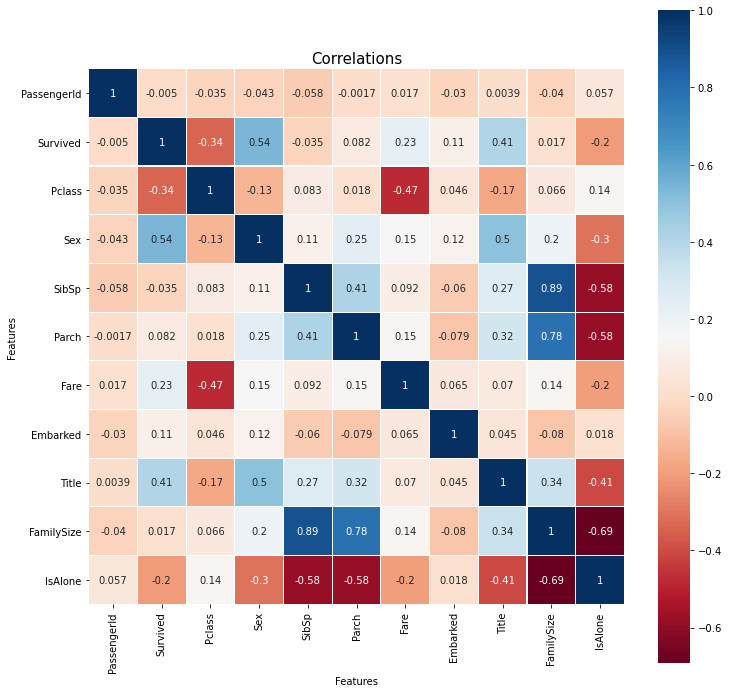

In [61]:
colormap=plt.cm.RdBu
figure = plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.title("Correlations",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [62]:
columns = ["Pclass","Sex", "Fare", "Embarked","Title","IsAlone"]
X_train =train_data[columns]
Y_train =train_data["Survived"]
len(Y_train)

891

In [64]:
X_test =test_data[columns]
len(X_test)

418

# ML Clasification Prediction

## 1- SGD Classifier(66%)

In [65]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, Y_train)
Y_pred_SGD = sgd_clf.predict(X_test)
print("the train score of SGD = ",round(sgd_clf.score(X_train, Y_train) *100, 2),"%")

the train score of SGD =  70.82 %


## 2- Random Forest (78%)

In [66]:
random_forest = RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.1, n_jobs=-1)
random_forest.fit(X_train, Y_train)
Y_pred_Random = random_forest.predict(X_test)
print("the train score of random_forest = ",round(random_forest.score(X_train, Y_train) *100, 2),"%")

the train score of random_forest =  83.84 %


## 3- Logistic Regression (76.6%)

In [67]:
logistic_regression = LogisticRegression(solver='liblinear',max_iter=1000)
logistic_regression.fit(X_train, Y_train)
Y_pred_Logistic = logistic_regression.predict(X_test)
print("the train score of logistic_regression = ",round(logistic_regression.score(X_train, Y_train) *100, 2),"%")

the train score of logistic_regression =  78.11 %


## 4- Decision Tree (78%)

In [68]:
tree = DecisionTreeClassifier(random_state=25)
tree.fit(X_train, Y_train)
Y_pred_Tree= tree.predict(X_test)
print("the score of prediction = ",round(tree.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  84.4 %


In [69]:
scores= cross_val_score(tree, X_train, Y_train, scoring="accuracy", cv=100)
scores.mean()

0.8190277777777779

## 5- SVM (76.55%)

In [70]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, Y_train)
Y_predict_svm = clf.predict(X_test)
print("the score of prediction = ",round(clf.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  78.68 %


## 6- KNeighbors (79.18%)

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred_KNN= knn.predict(X_test)
print("the score of prediction = ",round(knn.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  82.6 %


In [73]:
output_csv = {"PassengerId":[*range(892,892+len(Y_pred_KNN))], "Survived":Y_pred_KNN}
Y_pre = pd.DataFrame(output_csv)
Y_pre.set_index("PassengerId", drop=True, append=False, inplace=True)
Y_pre.to_csv("submission.csv")

## 7- MIPClassifier (77.5%)

In [74]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 2), random_state=1)
clf.fit(X_train, Y_train)
Y_pred_clf= clf.predict(X_test)
print("the score of prediction = ",round(clf.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  61.62 %


## 8- GaussianNB (74.6%)

In [75]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_gaussian = gaussian.predict(X_test)
print("the train score for Gaussian = ", round(gaussian.score(X_train, Y_train) * 100, 2), "%")

the train score for Gaussian =  77.78 %


## 9- Perceptron (78.2%)

In [76]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred_perceptron = perceptron.predict(X_test)
print("the train score for Perceptron = ",round(perceptron.score(X_train, Y_train) * 100, 2), "%")

the train score for Perceptron =  78.11 %


In [77]:
model = ["SGDClassifier", "Random Forest", "Logistic Regression", "Decision Tree", "SVM",
"KNeighbors", "MlPClassifier", "GaussianNB", "Perceptron"]
score = [66, 78, 76.6, 78, 76.55, 79.18, 77.5, 74.6, 78.2]
data_dict = {"models": model, "test_score": score}
data_score = pd.DataFrame(data_dict)
data_score.index = data_score.index + 1
data_score.sort_values("test_score",ascending=False)

,models,test_score
6,KNeighbors,79.18
9,Perceptron,78.20
2,Random Forest,78.00
4,Decision Tree,78.00
7,MlPClassifier,77.50
3,Logistic Regression,76.60
5,SVM,76.55
8,GaussianNB,74.60
1,SGDClassifier,66.00
